# Data Clean

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd

# Chargement du fichier CSV dans un DataFrame
data = pd.read_csv('data_tweet_sample_challenge.csv')

# Affichage du contenu du DataFrame
data.head()


,id,created_at,text,attachments.media,attachments.media_keys,attachments.poll.duration_minutes,attachments.poll.end_datetime,attachments.poll.id,attachments.poll.options,attachments.poll.voting_status,...,source,withheld.scope,withheld.copyright,withheld.country_codes,type,__twarc.retrieved_at,__twarc.url,__twarc.version,conversation_search,label
0,1075677468294635522,2018-12-20T09:01:08.000Z,RT @GameCentral: Borderlands 2 VR and it's rou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TweetDeck,NaN,NaN,NaN,NaN,2022-08-25T13:05:45+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.10.2,conversation_id:1075677468294635522,en
1,670304079214702592,2015-11-27T18:12:00.000Z,This is 'the world’s sexiest robot’... apparen...,"[{""width"": 1024, ""type"": ""photo"", ""media_key"":...","[""3_670304079109844992""]",NaN,NaN,NaN,NaN,NaN,...,Sprinklr,NaN,NaN,NaN,NaN,2022-08-25T13:04:56+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.10.2,conversation_id:670304079214702592,en
2,1085566226116628480,2019-01-16T15:55:31.000Z,Un antepasado del que no sabíamos nada 👴👵 #cie...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Besocy_Oficial,NaN,NaN,NaN,NaN,2022-08-25T16:43:04+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.10.2,conversation_id:1085566226116628480,es
3,968059526594420736,2018-02-26T09:45:51.000Z,"Im neuen #Porsche ""Mission E"" steckt die Block...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TweetDeck,NaN,NaN,NaN,retweeted,2022-08-25T16:13:46+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.10.2,conversation_id:968059526594420736,de
4,784508641508483072,2016-10-07T21:40:10.000Z,Tweede Wereldoorlog in virtual reality herbele...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Buffer,NaN,NaN,NaN,NaN,2022-08-25T16:20:22+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.10.2,conversation_id:784508641508483072,nl


In [2]:
# Afficher les noms de toutes les colonnes
print(data.columns)


Index(['id', 'created_at', 'text', 'attachments.media',
       'attachments.media_keys', 'attachments.poll.duration_minutes',
       'attachments.poll.end_datetime', 'attachments.poll.id',
       'attachments.poll.options', 'attachments.poll.voting_status',
       'attachments.poll_ids', 'author.id', 'author.created_at',
       'author.username', 'author.name', 'author.description',
       'author.entities.description.cashtags',
       'author.entities.description.hashtags',
       'author.entities.description.mentions',
       'author.entities.description.urls', 'author.entities.url.urls',
       'author.location', 'author.pinned_tweet_id', 'author.profile_image_url',
       'author.protected', 'author.public_metrics.followers_count',
       'author.public_metrics.following_count',
       'author.public_metrics.listed_count',
       'author.public_metrics.tweet_count', 'author.url', 'author.verified',
       'author.withheld.scope', 'author.withheld.copyright',
       'author.withheld

In [3]:
# Liste des colonnes à conserver
cols_to_keep = ["id", "created_at", "text", "author.id", "author.name", "public_metrics.like_count", "public_metrics.retweet_count", "label"]

# Filtrage du DataFrame pour ne conserver que les colonnes souhaitées
filtered_data = data[cols_to_keep]

# Affichage du DataFrame filtré
filtered_data.head()


,id,created_at,text,author.id,author.name,public_metrics.like_count,public_metrics.retweet_count,label
0,1075677468294635522,2018-12-20T09:01:08.000Z,RT @GameCentral: Borderlands 2 VR and it's rou...,138749160,Metro,0,1,en
1,670304079214702592,2015-11-27T18:12:00.000Z,This is 'the world’s sexiest robot’... apparen...,34655603,The Sun,3,5,en
2,1085566226116628480,2019-01-16T15:55:31.000Z,Un antepasado del que no sabíamos nada 👴👵 #cie...,38640768,La Voz de Galicia,2,1,es
3,968059526594420736,2018-02-26T09:45:51.000Z,"Im neuen #Porsche ""Mission E"" steckt die Block...",53023065,Lars Ophüls,3,3,de
4,784508641508483072,2016-10-07T21:40:10.000Z,Tweede Wereldoorlog in virtual reality herbele...,14702725,De Gelderlander,2,3,nl


In [4]:
# Réinitialisation des valeurs de la colonne 'id' en commençant à 1
filtered_data['id'] = range(1, len(filtered_data) + 1)

# Affichage du DataFrame mis à jour
filtered_data.head()

<ipython-input-4-0aa2babd2aed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['id'] = range(1, len(filtered_data) + 1)


,id,created_at,text,author.id,author.name,public_metrics.like_count,public_metrics.retweet_count,label
0,1,2018-12-20T09:01:08.000Z,RT @GameCentral: Borderlands 2 VR and it's rou...,138749160,Metro,0,1,en
1,2,2015-11-27T18:12:00.000Z,This is 'the world’s sexiest robot’... apparen...,34655603,The Sun,3,5,en
2,3,2019-01-16T15:55:31.000Z,Un antepasado del que no sabíamos nada 👴👵 #cie...,38640768,La Voz de Galicia,2,1,es
3,4,2018-02-26T09:45:51.000Z,"Im neuen #Porsche ""Mission E"" steckt die Block...",53023065,Lars Ophüls,3,3,de
4,5,2016-10-07T21:40:10.000Z,Tweede Wereldoorlog in virtual reality herbele...,14702725,De Gelderlander,2,3,nl


In [5]:
# Attribuer un identifiant unique à chaque valeur unique de la colonne 'author.id'
filtered_data['author.id'], unique_ids = pd.factorize(filtered_data['author.id'])

# Ajouter 1 car factorize commence à 0
filtered_data['author.id'] = filtered_data['author.id'] + 1

# Affichage du DataFrame mis à jour
filtered_data.head()

<ipython-input-5-3621b576cf97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['author.id'], unique_ids = pd.factorize(filtered_data['author.id'])
<ipython-input-5-3621b576cf97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['author.id'] = filtered_data['author.id'] + 1


,id,created_at,text,author.id,author.name,public_metrics.like_count,public_metrics.retweet_count,label
0,1,2018-12-20T09:01:08.000Z,RT @GameCentral: Borderlands 2 VR and it's rou...,1,Metro,0,1,en
1,2,2015-11-27T18:12:00.000Z,This is 'the world’s sexiest robot’... apparen...,2,The Sun,3,5,en
2,3,2019-01-16T15:55:31.000Z,Un antepasado del que no sabíamos nada 👴👵 #cie...,3,La Voz de Galicia,2,1,es
3,4,2018-02-26T09:45:51.000Z,"Im neuen #Porsche ""Mission E"" steckt die Block...",4,Lars Ophüls,3,3,de
4,5,2016-10-07T21:40:10.000Z,Tweede Wereldoorlog in virtual reality herbele...,5,De Gelderlander,2,3,nl


In [6]:
# Convertir la colonne 'created_at' en un objet datetime
filtered_data['created_at'] = pd.to_datetime(filtered_data['created_at'])

# Créer une nouvelle colonne pour stocker uniquement la date (année, mois, jour)
filtered_data['date'] = filtered_data['created_at'].dt.strftime('%Y-%m-%d')

# Fonction pour déterminer la période de la journée
def get_daytime(hour):
    if 6 <= hour < 12:
        return "matin"
    elif 12 <= hour < 19:
        return "après-midi"
    elif 19 <= hour <= 23:
        return "soir"
    else:
        return "nuit"

# Créer la colonne 'daytime' en utilisant la fonction précédente
filtered_data['daytime'] = filtered_data['created_at'].dt.hour.apply(get_daytime)

# Affichage du DataFrame mis à jour
filtered_data[['date', 'daytime']].head()


<ipython-input-6-99f57f3a4b9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['created_at'] = pd.to_datetime(filtered_data['created_at'])
<ipython-input-6-99f57f3a4b9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = filtered_data['created_at'].dt.strftime('%Y-%m-%d')
<ipython-input-6-99f57f3a4b9a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,date,daytime
0,2018-12-20,matin
1,2015-11-27,après-midi
2,2019-01-16,après-midi
3,2018-02-26,matin
4,2016-10-07,soir


In [7]:
filtered_data

,id,created_at,text,author.id,author.name,public_metrics.like_count,public_metrics.retweet_count,label,date,daytime
0,1,2018-12-20 09:01:08+00:00,RT @GameCentral: Borderlands 2 VR and it's rou...,1,Metro,0,1,en,2018-12-20,matin
1,2,2015-11-27 18:12:00+00:00,This is 'the world’s sexiest robot’... apparen...,2,The Sun,3,5,en,2015-11-27,après-midi
2,3,2019-01-16 15:55:31+00:00,Un antepasado del que no sabíamos nada 👴👵 #cie...,3,La Voz de Galicia,2,1,es,2019-01-16,après-midi
3,4,2018-02-26 09:45:51+00:00,"Im neuen #Porsche ""Mission E"" steckt die Block...",4,Lars Ophüls,3,3,de,2018-02-26,matin
4,5,2016-10-07 21:40:10+00:00,Tweede Wereldoorlog in virtual reality herbele...,5,De Gelderlander,2,3,nl,2016-10-07,soir
...,...,...,...,...,...,...,...,...,...,...
2995,2996,2013-08-02 03:46:46+00:00,"Robi, ecco il robot fai-da-te | Video http:/...",32,Corriere della Sera,0,3,it,2013-08-02,nuit
2996,2997,2018-09-24 11:08:48+00:00,Robot sex brothel 'teaches men to be rapists' ...,6,The Mirror,3,5,en,2018-09-24,matin
2997,2998,2016-10-17 17:30:17+00:00,"Renzi a Pisa, tra selfie e strette di mano ""ro...",15,Repubblica,5,6,it,2016-10-17,après-midi
2998,2999,2017-06-30 18:59:44+00:00,Mit Turnschuhen... Wie ich einmal den Ätna bes...,50,Martin Heller,11,5,de,2017-06-30,après-midi


In [8]:
filtered_data[['text']]

,text
0,RT @GameCentral: Borderlands 2 VR and it's rou...
1,This is 'the world’s sexiest robot’... apparen...
2,Un antepasado del que no sabíamos nada 👴👵 #cie...
3,"Im neuen #Porsche ""Mission E"" steckt die Block..."
4,Tweede Wereldoorlog in virtual reality herbele...
...,...
2995,"Robi, ecco il robot fai-da-te | Video http:/..."
2996,Robot sex brothel 'teaches men to be rapists' ...
2997,"Renzi a Pisa, tra selfie e strette di mano ""ro..."
2998,Mit Turnschuhen... Wie ich einmal den Ätna bes...


In [9]:
# Afficher toutes les valeurs de la colonne 'text'
for text in filtered_data['text']:
    print(text)
    print("/n")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Pixel, arriva la modalità 'foto notturna': l'intelligenza artificiale accende la luce [news aggiornata alle 12:41] https://t.co/xeC15NZWxx
/n
Intelligence artificielle : pour la CGT, le binaire de la guerre https://t.co/wlcL6B9Mls
/n
RT @javisalas: 1/ Se habla mucho de armas autónomas, coches inteligentes, robots que nos quitan el curro... pero hay un problema que los so…
/n
Star Wars-inspired robot dog coming to a home near you soon https://t.co/EC21u8puph
/n
Comment Central: Is President Obama really a robot? http://bit.ly/iZrqV
/n
Les géants des technologies multiplient les rachats dans l'intelligence artificielle https://t.co/qnEYoeiUOY https://t.co/fS7QIZXlNL
/n
Mealworm dumplings and virtual reality: the best date ever? http://t.co/owmtn6Ua7Q
/n
Golf, ecco come arrivare dritti in buca grazie all’Intelligenza artificiale https://t.co/zKystTT3mG
/n
Man's Facebook post listing 30 reasons why 2016 has in fa

In [10]:
import re

# Fonction pour extraire les hashtags d'une chaîne de caractères
def extract_hashtags(text):
    return re.findall(r'#\w+', text)

# Créer la colonne 'hashtag' en utilisant la fonction précédente
filtered_data['hashtag'] = filtered_data['text'].apply(extract_hashtags)

# Affichage du DataFrame mis à jour
filtered_data[['text', 'hashtag']].head()


<ipython-input-10-0c95a1fe9de1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hashtag'] = filtered_data['text'].apply(extract_hashtags)


,text,hashtag
0,RT @GameCentral: Borderlands 2 VR and it's rou...,[]
1,This is 'the world’s sexiest robot’... apparen...,[]
2,Un antepasado del que no sabíamos nada 👴👵 #cie...,"[#ciencia, #neardental, #denisovano, #intelige..."
3,"Im neuen #Porsche ""Mission E"" steckt die Block...","[#Porsche, #Handelsblatt]"
4,Tweede Wereldoorlog in virtual reality herbele...,[]


# Data Visu

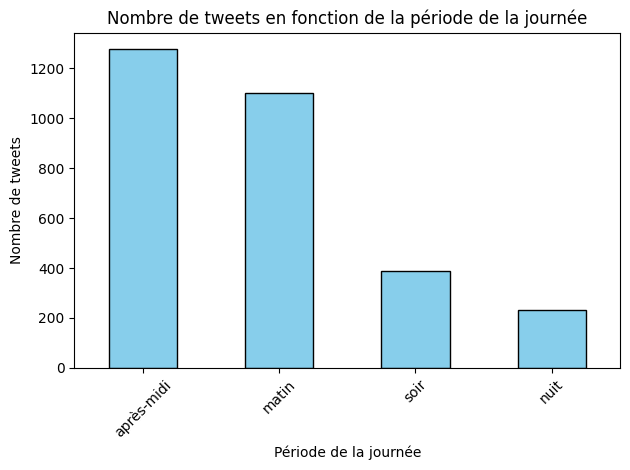

In [11]:
import matplotlib.pyplot as plt

# Compter le nombre de tweets pour chaque période de la journée
daytime_counts = filtered_data['daytime'].value_counts()

# Créer un diagramme à barres
daytime_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Titre et étiquettes pour les axes
plt.title('Nombre de tweets en fonction de la période de la journée')
plt.xlabel('Période de la journée')
plt.ylabel('Nombre de tweets')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le diagramme
plt.show()


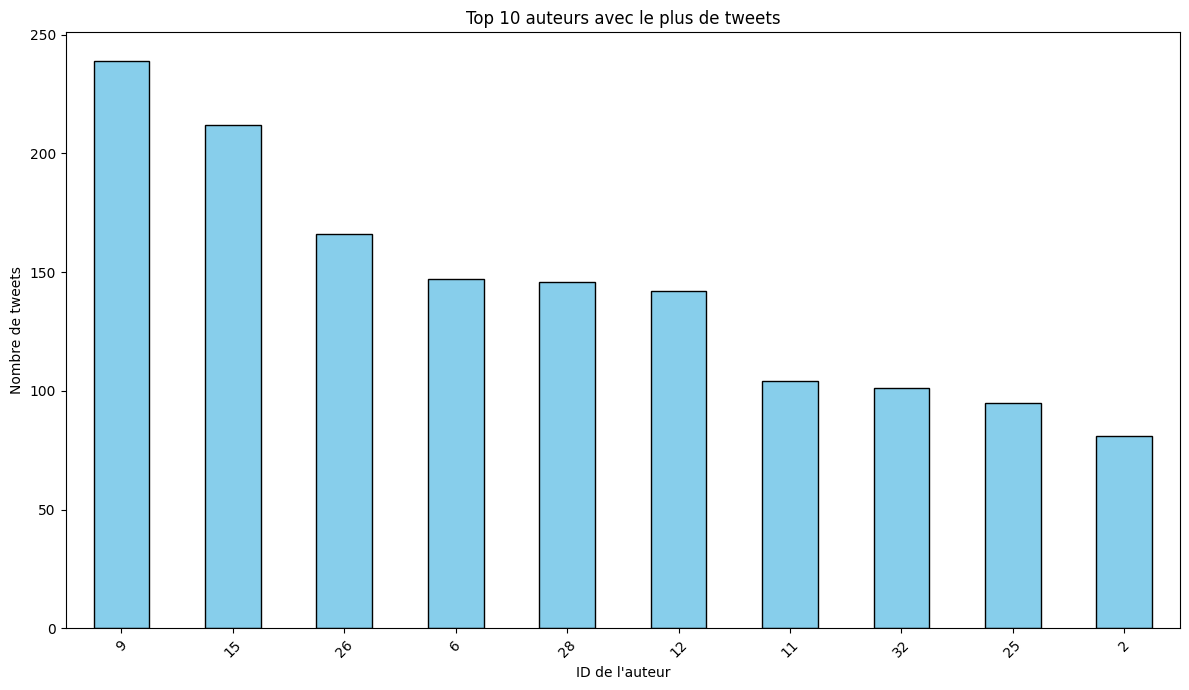

In [12]:
import matplotlib.pyplot as plt

# Compter le nombre de tweets pour chaque auteur
author_counts = filtered_data['author.id'].value_counts()

# Pour une meilleure lisibilité, vous pouvez choisir de visualiser seulement les top N auteurs.
# Par exemple, pour les 10 auteurs les plus actifs :
top_n = 10
top_authors = author_counts.head(top_n)

# Créer un diagramme à barres
plt.figure(figsize=(12, 7))
top_authors.plot(kind='bar', color='skyblue', edgecolor='black')

# Titre et étiquettes pour les axes
plt.title('Top {} auteurs avec le plus de tweets'.format(top_n))
plt.xlabel('ID de l\'auteur')
plt.ylabel('Nombre de tweets')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le diagramme
plt.show()


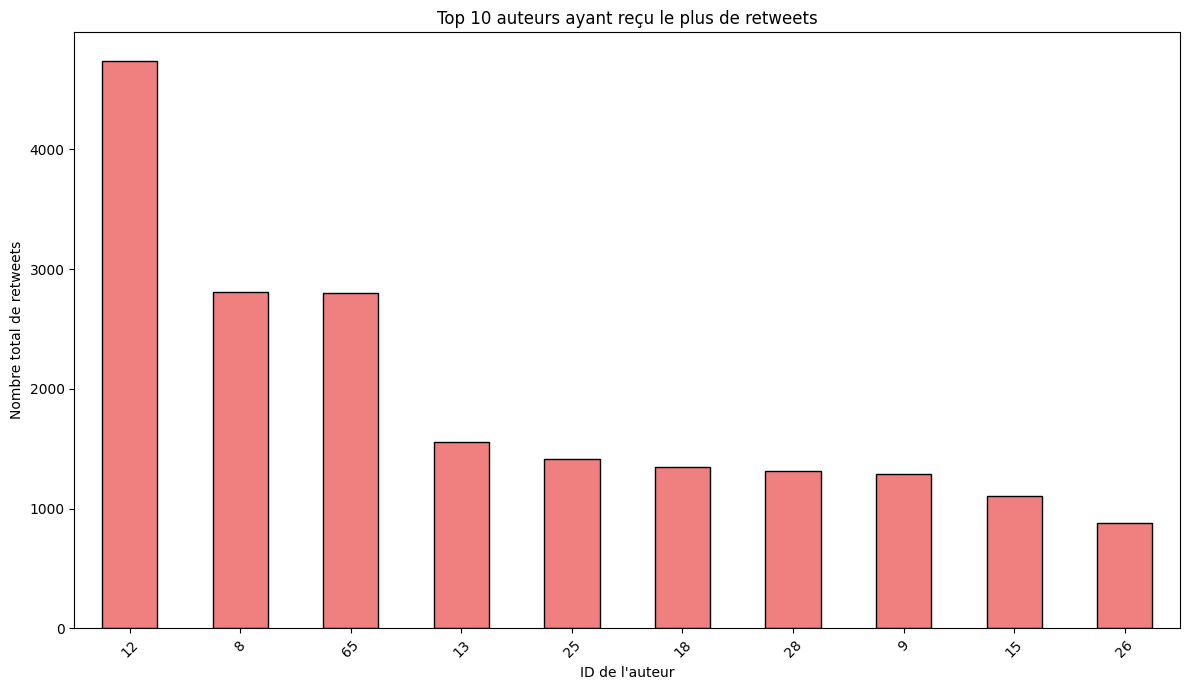

In [13]:
import matplotlib.pyplot as plt

# Grouper par 'author.id' et sommer les retweets
author_retweets = filtered_data.groupby('author.id')['public_metrics.retweet_count'].sum()

# Trier les auteurs par le nombre total de retweets reçus
sorted_authors = author_retweets.sort_values(ascending=False)

# Pour une meilleure lisibilité, vous pouvez choisir de visualiser seulement les top N auteurs.
# Par exemple, pour les 10 auteurs ayant reçu le plus de retweets :
top_n = 10
top_authors_retweets = sorted_authors.head(top_n)

# Créer un diagramme à barres
plt.figure(figsize=(12, 7))
top_authors_retweets.plot(kind='bar', color='lightcoral', edgecolor='black')

# Titre et étiquettes pour les axes
plt.title('Top {} auteurs ayant reçu le plus de retweets'.format(top_n))
plt.xlabel('ID de l\'auteur')
plt.ylabel('Nombre total de retweets')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le diagramme
plt.show()


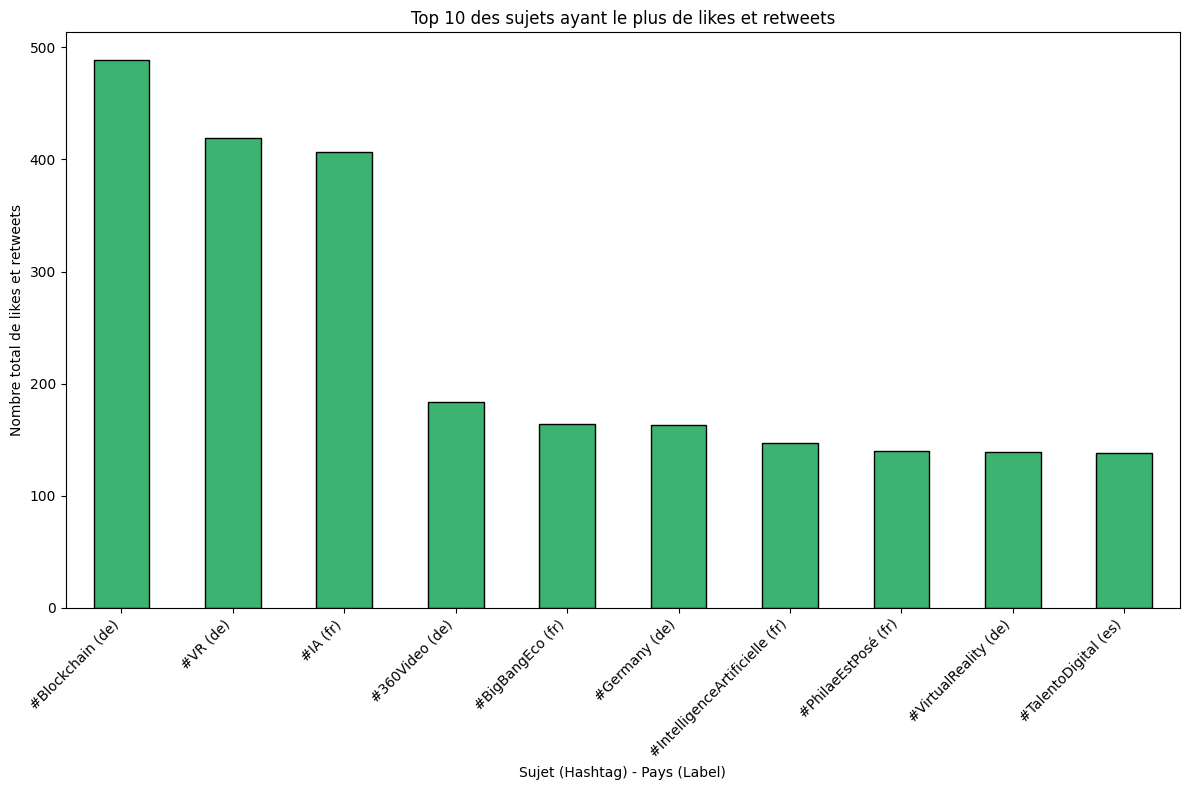

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Éclater la colonne 'hashtag' pour avoir une ligne par hashtag
exploded_data = filtered_data.explode('hashtag')

# Grouper par 'hashtag' et 'label' (pays) et sommer les likes et les retweets
grouped_data = exploded_data.groupby(['hashtag', 'label'])[['public_metrics.like_count', 'public_metrics.retweet_count']].sum()

# Créer une nouvelle colonne pour le total des likes et retweets
grouped_data['total'] = grouped_data['public_metrics.like_count'] + grouped_data['public_metrics.retweet_count']

# Trier les données par le total des likes et retweets
sorted_data = grouped_data.sort_values(by='total', ascending=False).head(10)

# Créer un diagramme à barres pour visualiser le top 10 des sujets
fig, ax = plt.subplots(figsize=(12, 8))
sorted_data['total'].plot(kind='bar', ax=ax, color='mediumseagreen', edgecolor='black')

# Titre et étiquettes pour les axes
ax.set_title('Top 10 des sujets ayant le plus de likes et retweets')
ax.set_xlabel('Sujet (Hashtag) - Pays (Label)')
ax.set_ylabel('Nombre total de likes et retweets')
ax.set_xticklabels([f"{row[0]} ({row[1]})" for row in sorted_data.index], rotation=45, ha='right')
plt.tight_layout()

# Afficher le diagramme
plt.show()


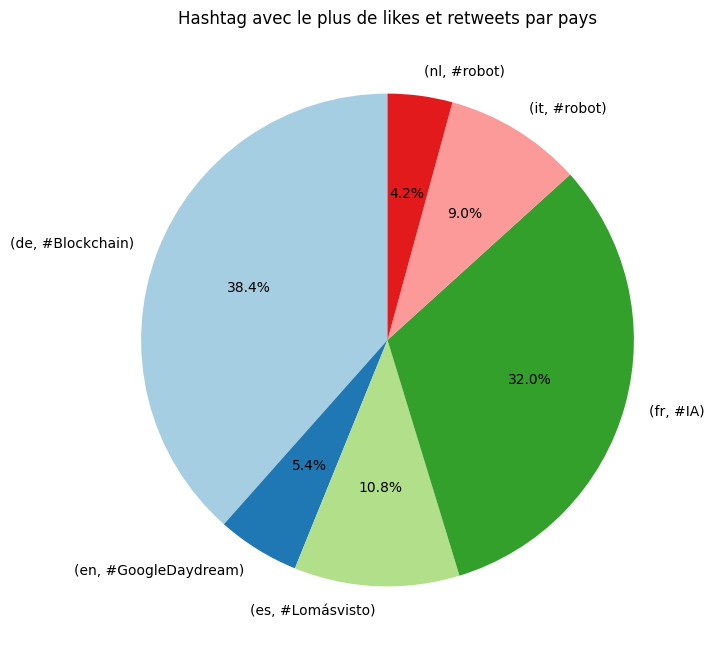

In [16]:
import matplotlib.pyplot as plt

# Grouper par 'label' (pays) et 'hashtag', puis sommer les likes et les retweets
grouped_data = exploded_data.groupby(['label', 'hashtag'])[['public_metrics.like_count', 'public_metrics.retweet_count']].sum()

# Calculer le total des likes et retweets pour chaque combinaison
grouped_data['total'] = grouped_data['public_metrics.like_count'] + grouped_data['public_metrics.retweet_count']

# Sélectionner le hashtag avec le plus grand total pour chaque pays
top_hashtags_per_country = grouped_data['total'].groupby('label').idxmax()

# Extraire les valeurs totales pour ces hashtags
top_values = grouped_data.loc[top_hashtags_per_country]['total']

# Créer un diagramme en camembert
plt.figure(figsize=(12, 8))
top_values.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Titre
plt.title('Hashtag avec le plus de likes et retweets par pays')
plt.ylabel('')  # Supprimer le label de l'axe y pour une meilleure esthétique

# Afficher le diagramme
plt.show()


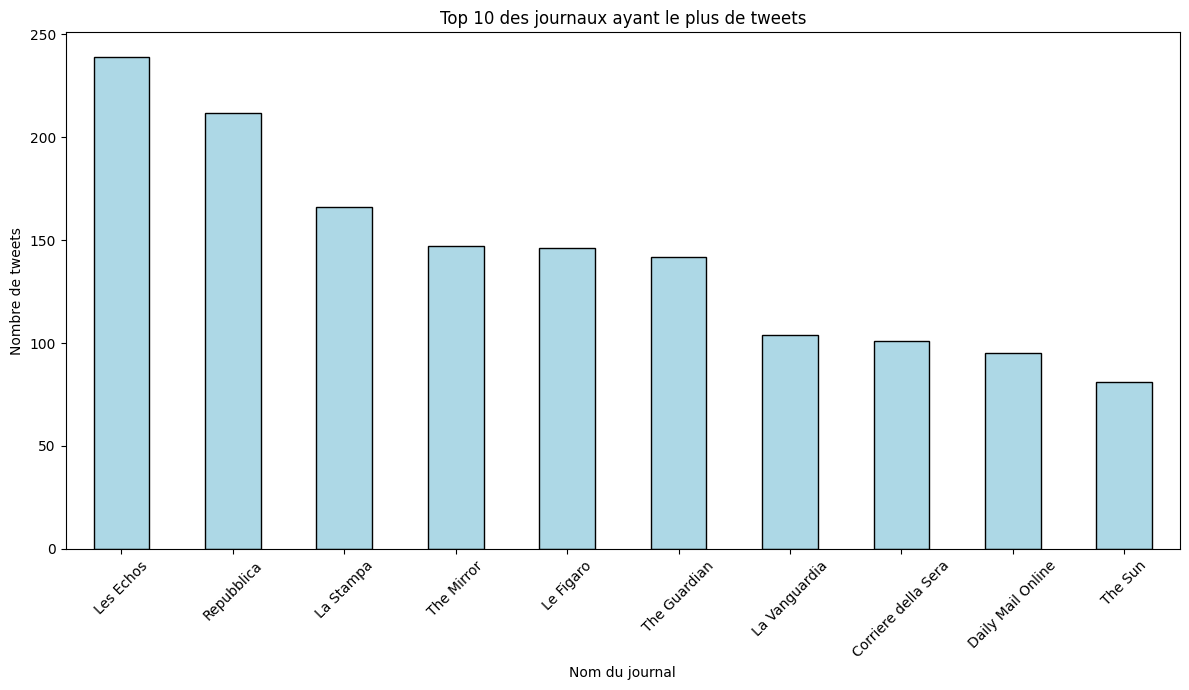

In [17]:
import matplotlib.pyplot as plt

# 1. Compter le nombre de tweets pour chaque journal
journal_tweet_counts = filtered_data['author.name'].value_counts()

# 2. Afficher le top 10 des journaux ayant le plus de tweets
top_10_journals = journal_tweet_counts.head(10)

plt.figure(figsize=(12, 7))
top_10_journals.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 10 des journaux ayant le plus de tweets')
plt.xlabel('Nom du journal')
plt.ylabel('Nombre de tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




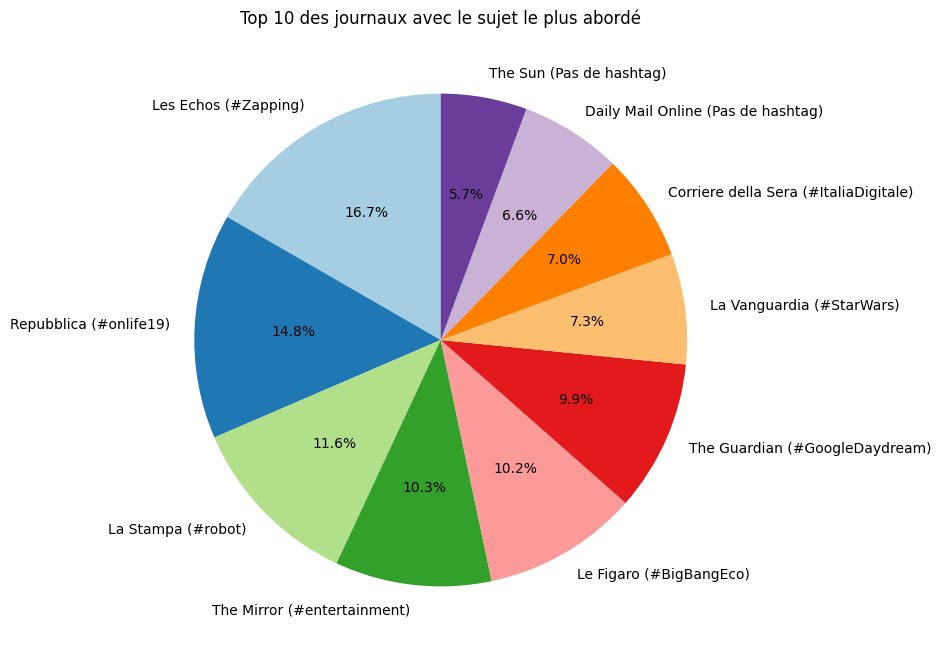

In [18]:
# 3. Pour chaque journal du top 10, identifier le sujet (hashtag) dont ils parlent le plus
top_hashtags = {}
for journal in top_10_journals.index:
    journal_data = exploded_data[exploded_data['author.name'] == journal]
    hashtags_series = journal_data['hashtag'].dropna()  # Supprimer les valeurs nulles
    if not hashtags_series.empty:  # Vérifier si la séquence des hashtags n'est pas vide
        top_hashtag = hashtags_series.value_counts().idxmax()
        top_hashtags[journal] = top_hashtag
    else:
        top_hashtags[journal] = 'Pas de hashtag'

# 4. Afficher un diagramme en camembert pour le top 10 des journaux avec le sujet dont ils parlent le plus
labels = [f"{journal} ({hashtag})" for journal, hashtag in top_hashtags.items()]
sizes = [top_10_journals[journal] for journal in top_hashtags.keys()]

plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 10 des journaux avec le sujet le plus abordé')
plt.show()


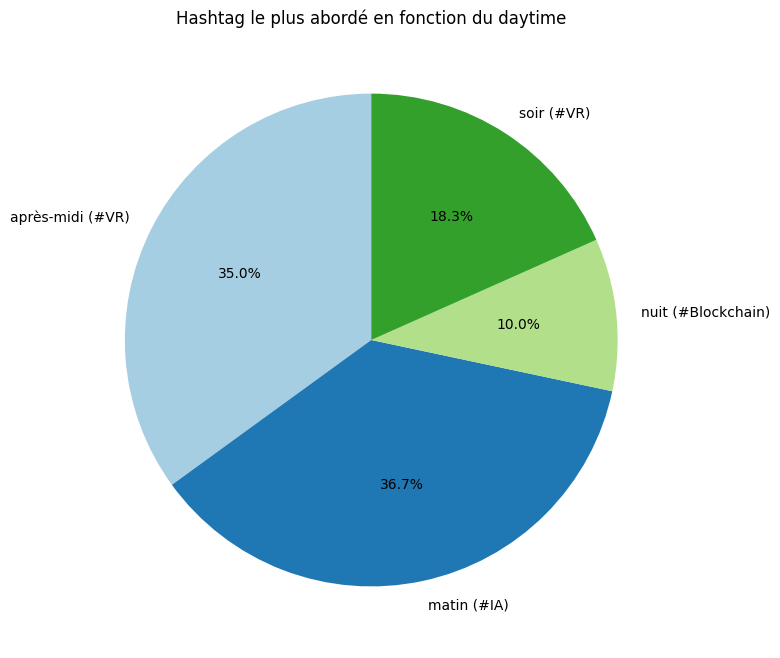

In [19]:
import matplotlib.pyplot as plt

# 1. Grouper les données par 'daytime' et 'hashtag', puis compter le nombre d'occurrences
grouped_data = exploded_data.groupby(['daytime', 'hashtag']).size()

# 2. Pour chaque 'daytime', identifier le hashtag le plus fréquent
top_hashtags_per_daytime = grouped_data.groupby('daytime').idxmax()

# Extraire les valeurs pour ces hashtags
top_values = grouped_data.loc[top_hashtags_per_daytime]

# 3. Afficher un diagramme en camembert pour le hashtag le plus fréquent par 'daytime'
labels = [f"{row[0]} ({row[1]})" for row in top_hashtags_per_daytime]
sizes = top_values.values

plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Hashtag le plus abordé en fonction du daytime')
plt.show()


# Data Analyse

In [20]:
import re

def clean_tweet(tweet):
    # Retirer les liens
    tweet = re.sub(r'http\S+', '', tweet)

    # Retirer les emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # émoticônes
                               u"\U0001F300-\U0001F5FF"  # symboles & pictogrammes
                               u"\U0001F680-\U0001F6FF"  # symboles de transport & cartes
                               u"\U0001F700-\U0001F77F"  # symboles alchimiques
                               u"\U0001F780-\U0001F7FF"  # Géométrie et lettrage
                               u"\U0001F800-\U0001F8FF"  # Supplément de symboles et de pictogrammes
                               u"\U0001F900-\U0001F9FF"  # Supplément de symboles et de pictogrammes 2
                               u"\U0001FA00-\U0001FA6F"  # Symboles de la route
                               u"\U0001FA70-\U0001FAFF"  # Symboles divers
                               u"\U00002702-\U000027B0"  # Divers symboles comme ☀, ☁, etc.
                               u"\U000024C2-\U0001F251"  # Divers symboles comme Ⓜ, Ⓤ, etc.
                               "]+", flags=re.UNICODE)
    tweet = emoji_pattern.sub(r'', tweet)

    # Retirer les hashtags
    tweet = re.sub(r'#\S+', '', tweet)

    # Retirer les caractères spéciaux
    tweet = re.sub(r'[^\w\s]', '', tweet)

    return tweet

# Appliquer la fonction de nettoyage à chaque tweet
filtered_data['cleaned_text'] = filtered_data['text'].apply(clean_tweet)

# Afficher les résultats
print(filtered_data[['text', 'cleaned_text']])

                                                   text  \
0     RT @GameCentral: Borderlands 2 VR and it's rou...   
1     This is 'the world’s sexiest robot’... apparen...   
2     Un antepasado del que no sabíamos nada 👴👵 #cie...   
3     Im neuen #Porsche "Mission E" steckt die Block...   
4     Tweede Wereldoorlog in virtual reality herbele...   
...                                                 ...   
2995  Robi, ecco il robot   fai-da-te | Video http:/...   
2996  Robot sex brothel 'teaches men to be rapists' ...   
2997  Renzi a Pisa, tra selfie e strette di mano "ro...   
2998  Mit Turnschuhen... Wie ich einmal den Ätna bes...   
2999  RT @MirrorWeirdNews: This robot is the first t...   

                                           cleaned_text  
0     RT GameCentral Borderlands 2 VR and its rough ...  
1         This is the worlds sexiest robot apparently    
2          Un antepasado del que no sabíamos nada        
3     Im neuen  Mission E steckt die Blockchain  und...  
4

<ipython-input-20-7e92b7044d55>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cleaned_text'] = filtered_data['text'].apply(clean_tweet)


In [21]:
from transformers import pipeline


sentiment_classifier = pipeline('sentiment-analysis')


sentiment_results = sentiment_classifier(filtered_data['cleaned_text'].tolist())

# Create lists to store labels and scores
labels = []
scores = []

# Iterate through the sentiment analysis results
for result in sentiment_results:
    labels.append(result['label'])
    scores.append(result['score'])

# Add new columns to the DataFrame
filtered_data['sentiment_label'] = labels
filtered_data['sentiment_score'] = scores

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
<ipython-input-21-db9001455afa>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentiment_label'] = labels
<ipython-input-21-db9001455afa>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentiment_score'

In [22]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

# Charger le tokenizer et le modèle
tokenizer = AutoTokenizer.from_pretrained("Babelscape/wikineural-multilingual-ner")
model = AutoModelForTokenClassification.from_pretrained("Babelscape/wikineural-multilingual-ner")

# Créer un pipeline NER
nlp = pipeline("ner", model=model, tokenizer=tokenizer, grouped_entities=True)

# Fonction pour appliquer le NER à un tweet
def apply_ner_to_tweet(tweet):
    return nlp(tweet)

# Appliquer le NER à chaque tweet et stocker les résultats dans une nouvelle colonne 'ner_results'
filtered_data['ner_results'] = filtered_data['cleaned_text'].apply(apply_ner_to_tweet)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(
<ipython-input-22-868ddd5bc691>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['ner_results'] = filtered_data['cleaned_text'].apply(apply_ner_to_tweet)


In [23]:
filtered_data

,id,created_at,text,author.id,author.name,public_metrics.like_count,public_metrics.retweet_count,label,date,daytime,hashtag,cleaned_text,sentiment_label,sentiment_score,ner_results
0,1,2018-12-20 09:01:08+00:00,RT @GameCentral: Borderlands 2 VR and it's rou...,1,Metro,0,1,en,2018-12-20,matin,[],RT GameCentral Borderlands 2 VR and its rough ...,POSITIVE,0.989885,"[{'entity_group': 'MISC', 'score': 0.8579456, ..."
1,2,2015-11-27 18:12:00+00:00,This is 'the world’s sexiest robot’... apparen...,2,The Sun,3,5,en,2015-11-27,après-midi,[],This is the worlds sexiest robot apparently,POSITIVE,0.996995,[]
2,3,2019-01-16 15:55:31+00:00,Un antepasado del que no sabíamos nada 👴👵 #cie...,3,La Voz de Galicia,2,1,es,2019-01-16,après-midi,"[#ciencia, #neardental, #denisovano, #intelige...",Un antepasado del que no sabíamos nada,NEGATIVE,0.944099,[]
3,4,2018-02-26 09:45:51+00:00,"Im neuen #Porsche ""Mission E"" steckt die Block...",4,Lars Ophüls,3,3,de,2018-02-26,matin,"[#Porsche, #Handelsblatt]",Im neuen Mission E steckt die Blockchain und...,NEGATIVE,0.974945,"[{'entity_group': 'MISC', 'score': 0.98569167,..."
4,5,2016-10-07 21:40:10+00:00,Tweede Wereldoorlog in virtual reality herbele...,5,De Gelderlander,2,3,nl,2016-10-07,soir,[],Tweede Wereldoorlog in virtual reality herbele...,NEGATIVE,0.984556,"[{'entity_group': 'MISC', 'score': 0.99942195,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,2013-08-02 03:46:46+00:00,"Robi, ecco il robot fai-da-te | Video http:/...",32,Corriere della Sera,0,3,it,2013-08-02,nuit,[],Robi ecco il robot faidate Video,NEGATIVE,0.979460,"[{'entity_group': 'MISC', 'score': 0.7014742, ..."
2996,2997,2018-09-24 11:08:48+00:00,Robot sex brothel 'teaches men to be rapists' ...,6,The Mirror,3,5,en,2018-09-24,matin,[],Robot sex brothel teaches men to be rapists sa...,NEGATIVE,0.997674,"[{'entity_group': 'MISC', 'score': 0.66390747,..."
2997,2998,2016-10-17 17:30:17+00:00,"Renzi a Pisa, tra selfie e strette di mano ""ro...",15,Repubblica,5,6,it,2016-10-17,après-midi,[],Renzi a Pisa tra selfie e strette di mano robot,NEGATIVE,0.893265,"[{'entity_group': 'LOC', 'score': 0.9996314, '..."
2998,2999,2017-06-30 18:59:44+00:00,Mit Turnschuhen... Wie ich einmal den Ätna bes...,50,Martin Heller,11,5,de,2017-06-30,après-midi,"[#360Video, #Etna, #VR]",Mit Turnschuhen Wie ich einmal den Ätna bestei...,NEGATIVE,0.968964,"[{'entity_group': 'LOC', 'score': 0.8767689, '..."


In [24]:
# Liste des langues fournies
languages = ['en', 'es', 'de', 'nl', 'fr', 'it']

# Créer un dictionnaire pour stocker chaque DataFrame
dataframes_by_language = {}

for lang in languages:
    dataframes_by_language[lang] = filtered_data[filtered_data['label'] == lang]

# Pour accéder à un DataFrame spécifique, utilisez le code de langue comme clé
# Par exemple, pour accéder au DataFrame contenant les tweets en anglais :
tweets_en = dataframes_by_language['en']
tweets_es = dataframes_by_language['es']
tweets_de = dataframes_by_language['de']
tweets_nl = dataframes_by_language['nl']
tweets_fr = dataframes_by_language['fr']
tweets_it = dataframes_by_language['it']

In [25]:
tweets_en

,id,created_at,text,author.id,author.name,public_metrics.like_count,public_metrics.retweet_count,label,date,daytime,hashtag,cleaned_text,sentiment_label,sentiment_score,ner_results
0,1,2018-12-20 09:01:08+00:00,RT @GameCentral: Borderlands 2 VR and it's rou...,1,Metro,0,1,en,2018-12-20,matin,[],RT GameCentral Borderlands 2 VR and its rough ...,POSITIVE,0.989885,"[{'entity_group': 'MISC', 'score': 0.8579456, ..."
1,2,2015-11-27 18:12:00+00:00,This is 'the world’s sexiest robot’... apparen...,2,The Sun,3,5,en,2015-11-27,après-midi,[],This is the worlds sexiest robot apparently,POSITIVE,0.996995,[]
5,6,2016-06-09 18:47:15+00:00,Four-legged ROBOT HORSE can track fugitives an...,6,The Mirror,2,4,en,2016-06-09,après-midi,[],Fourlegged ROBOT HORSE can track fugitives and...,NEGATIVE,0.756360,"[{'entity_group': 'MISC', 'score': 0.78745323,..."
9,10,2016-10-05 18:22:00+00:00,Robot helps end 12-hour stand off with armed s...,6,The Mirror,4,3,en,2016-10-05,après-midi,[],Robot helps end 12hour stand off with armed su...,POSITIVE,0.992083,"[{'entity_group': 'MISC', 'score': 0.75750893,..."
13,14,2017-11-10 02:04:08+00:00,'Do you do a bingo night?': the New Zealand ch...,12,The Guardian,14,14,en,2017-11-10,nuit,[],Do you do a bingo night the New Zealand chatbo...,NEGATIVE,0.997228,"[{'entity_group': 'LOC', 'score': 0.9986048, '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977,2978,2017-01-26 15:55:33+00:00,Artificial intelligence can diagnose skin canc...,43,Mirror Tech,2,8,en,2017-01-26,après-midi,[],Artificial intelligence can diagnose skin canc...,NEGATIVE,0.853403,"[{'entity_group': 'MISC', 'score': 0.7542736, ..."
2978,2979,2016-06-15 19:26:50+00:00,RT @TheSunTech: This is the moment police enco...,2,The Sun,0,4,en,2016-06-15,soir,[],RT TheSunTech This is the moment police encoun...,NEGATIVE,0.980681,"[{'entity_group': 'ORG', 'score': 0.6635387, '..."
2989,2990,2016-07-25 15:45:58+00:00,Pepper the friendly robot begins helping custo...,25,Daily Mail Online,12,11,en,2016-07-25,après-midi,[],Pepper the friendly robot begins helping custo...,NEGATIVE,0.562124,"[{'entity_group': 'LOC', 'score': 0.9996803, '..."
2996,2997,2018-09-24 11:08:48+00:00,Robot sex brothel 'teaches men to be rapists' ...,6,The Mirror,3,5,en,2018-09-24,matin,[],Robot sex brothel teaches men to be rapists sa...,NEGATIVE,0.997674,"[{'entity_group': 'MISC', 'score': 0.66390747,..."


In [26]:
#translate from french to english
from happytransformer import HappyTextToText
from happytransformer import TTSettings

# Initialize the HappyTextToText model for translation
happy_tt = HappyTextToText("MARIAN", "Helsinki-NLP/opus-mt-fr-en")
args = TTSettings(min_length=0)

# Define a function to translate a given text from French to English
def translate_to_english(text):
    result = happy_tt.generate_text(text, args=args)
    return result.text

# Apply the translation function to each row in the "text" column of your DataFrame
tweets_fr['translated_text'] = tweets_fr['cleaned_text'].apply(translate_to_english)

# Display the translated DataFrame
tweets_fr[['cleaned_text', 'translated_text']]


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
<ipython-input-26-dc054a4610bc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_fr['translated_text'] = tweets_fr['cleaned_text'].apply(translate_to_english)


,cleaned_text,translated_text
6,Lintelligence artificielle à lassaut de nos l...,Artificial intelligence assaults our homes
8,La taxe robot voulue par benoithamon serait ...,The robot tax desired by benoithamon would be ...
10,RT LaCroix De lintelligence artificielle pour ...,RT LaCroix Artificial intelligence for waste s...
21,Un robot pour aider les étudiants malades gtgt,A robot to help students with gtgt
22,Quand lintelligence artificielle est autorisée...,When artificial intelligence is allowed to mak...
...,...,...
2971,RT Sport24Team Une combinaison pour sportifs p...,RT Sport24Team An award-winning combination fo...
2972,PS4 Pro Nintendo Mini Classic PlayStation VR ...,PS4 Pro Nintendo Mini Classic PlayStation VR C...
2975,RT FigaroTech Lintelligence artificielle envah...,RT FigaroTech Artificial intelligence invades ...
2987,RT decodeurs Homme blanc 35 ans provincial l...,RT decoders White male 35 years old provincial...


In [27]:
#translate from spanish to english
from happytransformer import HappyTextToText
from happytransformer import TTSettings

# Initialize the HappyTextToText model for translation
happy_tt = HappyTextToText("MARIAN", "Helsinki-NLP/opus-mt-es-en")
args = TTSettings(min_length=0)

# Define a function to translate a given text from French to English
def translate_to_english(text):
    result = happy_tt.generate_text(text, args=args)
    return result.text

# Apply the translation function to each row in the "text" column of your DataFrame
tweets_es['translated_text'] = tweets_es['cleaned_text'].apply(translate_to_english)

# Display the translated DataFrame
tweets_es[['cleaned_text', 'translated_text']]


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
<ipython-input-27-88bfab81acc3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_es['translated_text'] = tweets_es['cleaned_text'].apply(translate_to_english)


,cleaned_text,translated_text
2,Un antepasado del que no sabíamos nada,An ancestor we knew nothing about
7,RT elpais_tec Microsoft retira un robot que hi...,RT elpais_tec Microsoft removes robot that mad...
11,Arturo San Agustín critica en su última novela...,Arturo San Agustín criticizes science as a new...
12,RT elpais_retina Las relaciones interpersonale...,RT elpais_retina Interpersonal relationships a...
14,La Inteligencia Artificial burla el mítico tes...,Artificial Intelligence mocks the mythical Cap...
...,...,...
2979,RT elpaiscat El robot de Salvament Marítim cap...,RT elpaiscat The robot of Salvament Maritim ca...
2980,No te vuelvas loco la mejor oferta del Cyber...,Don't go crazy on the best Cyber Monday offer ...
2983,La agencia de noticias Xinhua incorpora dos lo...,Xinhua News Agency incorporates two television...
2988,RT manuelansede Interesantísimo el debate sobr...,RT humaneness of the debate on the future of h...


In [28]:
##translate from german to english

from happytransformer import HappyTextToText
from happytransformer import TTSettings

# Initialize the HappyTextToText model for translation
happy_tt = HappyTextToText("MARIAN", "Helsinki-NLP/opus-mt-de-en")
args = TTSettings(min_length=0)

# Define a function to translate a given text from French to English
def translate_to_english(text):
    result = happy_tt.generate_text(text, args=args)
    return result.text

# Apply the translation function to each row in the "text" column of your DataFrame
tweets_de['translated_text'] = tweets_de['cleaned_text'].apply(translate_to_english)

# Display the translated DataFrame
tweets_de[['cleaned_text', 'translated_text']]


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
<ipython-input-28-0adbbd0d06dc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_de['translated_text'] = tweets_de['cleaned_text'].apply(translate_to_english)


,cleaned_text,translated_text
3,Im neuen Mission E steckt die Blockchain und...,The new mission E is the blockchain and even m...
17,Microsoft hat sich zur CloudCompany mit angehä...,Microsoft has transformed into CloudCompany wi...
32,RT AxHoepner Noch zwei Tage bis zur Eröffnung ...,RT AxHoepner Two days to open These seven tren...
77,Blockchance Experten diskutieren Potenzial der...,Blockchance Experts discuss potential of block...
79,RT BerlinDigital mit dem filmen ronenmichael...,RT BerlinDigital with the filming ronenmichael...
...,...,...
2962,Freue mich die neue von SamsungDE testen zu k...,Looking forward to testing the new one from Sa...
2970,mit neuem Alle Entwicklungen zu und Co ab...,with new All developments to and Co from now c...
2986,Digital Health ist zum Milliardenmarkt geworde...,Digital Health has become a billion-dollar mar...
2994,RT Edison_Media Sehr cool Bei den Stadtwerken ...,RT Edison_Media Very cool At the WSWWuppertal ...


In [29]:
#translate from dutch to english

from happytransformer import HappyTextToText
from happytransformer import TTSettings

# Initialize the HappyTextToText model for translation
happy_tt = HappyTextToText("MARIAN", "Helsinki-NLP/opus-mt-nl-en")
args = TTSettings(min_length=0)

# Define a function to translate a given text from French to English
def translate_to_english(text):
    result = happy_tt.generate_text(text, args=args)
    return result.text

# Apply the translation function to each row in the "text" column of your DataFrame
tweets_nl['translated_text'] = tweets_nl['cleaned_text'].apply(translate_to_english)
# Display the translated DataFrame

tweets_nl[['cleaned_text', 'translated_text']]


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
<ipython-input-29-6ee215b7c483>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_nl['translated_text'] = tweets_nl['cleaned_text'].apply(translate_to_english)


,cleaned_text,translated_text
4,Tweede Wereldoorlog in virtual reality herbele...,Relive World War II in virtual reality with app
27,Hypotheekadviseur wordt robot Hij is duidelijk...,Mortgage consultant becomes robot He is cleare...
30,Troepen Kaddafi steken grens met Tunesië over ...,Forces Kaddafi cross border with Tunisia over ...
35,Het lijkt een kwestie van tijd voordat iederee...,It seems a matter of time before everyone can ...
39,Uniek virtuele robot officieel inwoner Tokion,Unique virtual robot official resident Tokyo
...,...,...
2792,Experts hebben moeite met menselijke robot Sop...,Experts have trouble with human robot Sophia T...
2822,RT thomasvdkolk Wereldprimeur voor het eerst i...,NT1 cancer surgery
2841,RT nrcslimleven Ons brein behandelt virtual re...,RT nrcslimlife Our brain treats virtual realit...
2847,HTC heeft de definitieve versie van de Vive VR...,HTC has revealed the final version of the Vive...


In [30]:
#translate from italian to english

from happytransformer import HappyTextToText
from happytransformer import TTSettings

# Initialize the HappyTextToText model for translation
happy_tt = HappyTextToText("MARIAN", "Helsinki-NLP/opus-mt-it-en")
args = TTSettings(min_length=0)

# Define a function to translate a given text from French to English
def translate_to_english(text):
    result = happy_tt.generate_text(text, args=args)
    return result.text

# Apply the translation function to each row in the "text" column of your DataFrame
tweets_it['translated_text'] = tweets_it['cleaned_text'].apply(translate_to_english)

# Display the translated DataFrame
tweets_it[['cleaned_text', 'translated_text']]



/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
<ipython-input-30-ac2e85f16c83>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_it['translated_text'] = tweets_it['cleaned_text'].apply(translate_to_english)


,cleaned_text,translated_text
18,Cassie il fattorino robot che cammina come uno...,Cassie the robot delivery boy walking like an ...
20,Intelligenza artificiale la sfida arriva in co...,Artificial intelligence the challenge comes in...
23,Ora è lIntelligenza artificiale ad indicare al...,Now it is artificial intelligence to indicate ...
26,Professione Legodesigner Daniele gira il mondo...,Profession Legodesigner Daniele turns the worl...
31,Lo chiamavano Jeeg Robot e domani viene a trov...,They called him Jeeg Robot and tomorrow he'll ...
...,...,...
2985,RT rep_tecno Il volto umano dellintelligenza a...,RT rep_tecno The human face of artificial inte...
2992,RT BrunoRuffilli Cosè la blockchain come funzi...,NT BrunoRuffilli What is the blockchain how it...
2993,La Soyuz col robot cosmonauta ai comandi falli...,Soyuz with the cosmonaut robot at the controls...
2995,Robi ecco il robot faidate Video,Robi here is the robot donate Video


In [31]:
# Check if "translated_text" column exists, if not, create it with values from "text"
if "translated_text" not in tweets_en.columns:
    tweets_en["translated_text"] = tweets_en["text"]



# Concatenate all DataFrames, including df_english
all_datasets = [tweets_it, tweets_fr, tweets_nl, tweets_es, tweets_de, tweets_en]
df = pd.concat(all_datasets, ignore_index=True)

# reset the index
df.reset_index(drop=True, inplace=True)

<ipython-input-31-7f1ec11eb815>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_en["translated_text"] = tweets_en["text"]


In [32]:
df

,id,created_at,text,author.id,author.name,public_metrics.like_count,public_metrics.retweet_count,label,date,daytime,hashtag,cleaned_text,sentiment_label,sentiment_score,ner_results,translated_text
0,19,2018-06-12 15:50:15+00:00,"Cassie, il fattorino robot che cammina come un...",15,Repubblica,3,1,it,2018-06-12,après-midi,[],Cassie il fattorino robot che cammina come uno...,NEGATIVE,0.949016,"[{'entity_group': 'PER', 'score': 0.5729852, '...",Cassie the robot delivery boy walking like an ...
1,21,2017-12-29 15:21:14+00:00,"Intelligenza artificiale, la sfida arriva in c...",17,Il Fatto Quotidiano,8,3,it,2017-12-29,après-midi,[],Intelligenza artificiale la sfida arriva in co...,NEGATIVE,0.986553,"[{'entity_group': 'MISC', 'score': 0.9577576, ...",Artificial intelligence the challenge comes in...
2,24,2019-07-06 08:18:06+00:00,Ora è l'Intelligenza artificiale ad indicare a...,15,Repubblica,3,0,it,2019-07-06,matin,[],Ora è lIntelligenza artificiale ad indicare al...,NEGATIVE,0.985852,"[{'entity_group': 'MISC', 'score': 0.53465074,...",Now it is artificial intelligence to indicate ...
3,27,2016-02-01 15:07:06+00:00,Professione Lego-designer: Daniele gira il mon...,19,Repubblica Next,25,10,it,2016-02-01,après-midi,[],Professione Legodesigner Daniele gira il mondo...,NEGATIVE,0.925115,"[{'entity_group': 'PER', 'score': 0.970073, 'w...",Profession Legodesigner Daniele turns the worl...
4,32,2016-03-07 10:00:42+00:00,"""Lo chiamavano Jeeg Robot"" e domani viene a tr...",21,Webnotte,7,4,it,2016-03-07,matin,[#webnotte],Lo chiamavano Jeeg Robot e domani viene a trov...,NEGATIVE,0.943927,"[{'entity_group': 'MISC', 'score': 0.8838329, ...",They called him Jeeg Robot and tomorrow he'll ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2978,2017-01-26 15:55:33+00:00,Artificial intelligence can diagnose skin canc...,43,Mirror Tech,2,8,en,2017-01-26,après-midi,[],Artificial intelligence can diagnose skin canc...,NEGATIVE,0.853403,"[{'entity_group': 'MISC', 'score': 0.7542736, ...",Artificial intelligence can diagnose skin canc...
2996,2979,2016-06-15 19:26:50+00:00,RT @TheSunTech: This is the moment police enco...,2,The Sun,0,4,en,2016-06-15,soir,[],RT TheSunTech This is the moment police encoun...,NEGATIVE,0.980681,"[{'entity_group': 'ORG', 'score': 0.6635387, '...",RT @TheSunTech: This is the moment police enco...
2997,2990,2016-07-25 15:45:58+00:00,Pepper the friendly robot begins helping custo...,25,Daily Mail Online,12,11,en,2016-07-25,après-midi,[],Pepper the friendly robot begins helping custo...,NEGATIVE,0.562124,"[{'entity_group': 'LOC', 'score': 0.9996803, '...",Pepper the friendly robot begins helping custo...
2998,2997,2018-09-24 11:08:48+00:00,Robot sex brothel 'teaches men to be rapists' ...,6,The Mirror,3,5,en,2018-09-24,matin,[],Robot sex brothel teaches men to be rapists sa...,NEGATIVE,0.997674,"[{'entity_group': 'MISC', 'score': 0.66390747,...",Robot sex brothel 'teaches men to be rapists' ...


In [ ]:
from transformers import pipeline
import pandas as pd

# Load the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="sileod/deberta-v3-base-tasksource-nli")

# Example candidate labels
candidate_labels = ['IA', 'programming', 'data','popular','versatile']

# Assuming you have a DataFrame called 'df' with a 'cleaned text' column
# Iterate through the 'cleaned text' values and classify each tweet
classification_results = []
for text in df['translated_text']:
    result = classifier(text, candidate_labels)
    classification_results.append(result)

# Create a new DataFrame to store the classification results
results_df = pd.DataFrame(classification_results, columns=candidate_labels)

# Concatenate the results DataFrame with the original DataFrame 'df'
df = pd.concat([df, results_df], axis=1)

